# Resonant LLC Transformer Design

This document aims to be an interactive presentation of how to design the llc transformer. The following explenations are heavely based on [Application Note AN 2012-09](https://www.infineon.com/dgdl/Application_Note_Resonant+LLC+Converter+Operation+and+Design_Infineon.pdf?fileId=db3a30433a047ba0013a4a60e3be64a1).

## Converter Voltage Gain

The converter voltage gain $K_{converter}$ depends on the switching bridge gain $K_{bridge}$, which is $1$ for a full bridge and $0.5$ for a half bridge, the transformer turn ration $a = \frac{N_s}{N_p}$ and the gain $K_{LLC}$ of the resonant tank, which sums up to
\begin{equation}
K_{converter} = K_{bridge} \cdot a \cdot K_{LLC}.
\tag{1}
\end{equation}

The resonant tank gain $K_{LLC}$ is defined as
\begin{equation}
K_{LLC} (Q, m, F_x) = \left | \frac{V_{o_{ac}}(s)}{V_{in_{ac}}(s)} \right | = \frac{F_x^2(m-1)}{\sqrt{(m \cdot F_x^2 -1)^2 + F_x^2 \cdot (F_x^2 - 1)^2 \cdot (m-1)^2 \cdot Q^2}},
\tag{2}
\end{equation}

where the Quality Factor $Q$ is defined as
\begin{equation}
 Q = \frac{\sqrt{\frac{L_r}{C_r}}}{R_{ac}},
\tag{3}
\end{equation}
the reflected load resistance $R_{ac}$ is defined as
\begin{equation}
R_{ac} = \frac{8}{\pi^2} \cdot \frac{N_p^2}{N_s^2} \cdot R_0,
\tag{4}
\end{equation}
the normalized switching frequency $F_x$ is defined as
\begin{equation}
F_x = \frac{f_s}{f_r},
\tag{5}
\end{equation}
where $f_s$ is the switching frequency and $f_r$ is the resonant frequency
\begin{equation}
f_r = \frac{1}{2 \pi \sqrt{L_r \cdot C_r}}.
\tag{6}
\end{equation}
The ratio $m$ of the total primary inductance to the resonant inductance is defined as 
\begin{equation}
m = \frac{L_r + L_m}{L_r}.
\tag{7}
\end{equation}

## Design Steps

As in [AN 2012-09](https://www.infineon.com/dgdl/Application_Note_Resonant+LLC+Converter+Operation+and+Design_Infineon.pdf?fileId=db3a30433a047ba0013a4a60e3be64a1) we devide the design in five steps, which will be described in the following. Our goal is to archieve the **best possible efficiency while meeting the gain requirements under all load conditions**. Furthermore it is desired to stay in the inductive region across the entire input voltage and load current ranges.

### Step 1: Select the $Q_{max}$ value

If we insert $R_{ac}$ into the equation for $Q$ we obtain
\begin{equation}
Q = \frac{\sqrt{\frac{L_r}{C_r}}}{R_{ac}} = \frac{\sqrt{\frac{L_r}{C_r}}}{\frac{8}{\pi^2} \cdot \frac{N_p^2}{N_s^2} \cdot R_0} = \frac{\sqrt{\frac{L_r}{C_r}}}{\frac{8}{\pi^2} \cdot \frac{N_p^2}{N_s^2} \cdot \frac{V_O}{I_O}} = I_O \cdot \frac{\sqrt{\frac{L_r}{C_r}}}{\frac{8}{\pi^2} \cdot \frac{N_p^2}{N_s^2} \cdot V_O},
\tag{8}
\end{equation}
which shows that heavy load conditions result in a high quality factor and vice versa for light load conditions.

For our design it is important to select a value for $Q_{max}$ that corresponds to the maximum load point. **It is recommended to choose a moderate $Q_{max}$ value of aroung 0.5** as there isn't a direct method for selecting the optimum $Q$ value. In order to archieve the desired gain requirements we rather tune on the $m$ value.

The influence of the $Q$ value for the gain is shown in the following figure. Please note that in comparrison to [AN 2012-09](https://www.infineon.com/dgdl/Application_Note_Resonant+LLC+Converter+Operation+and+Design_Infineon.pdf?fileId=db3a30433a047ba0013a4a60e3be64a1) we haven't used a logarithmic scale for $F_x$ due to practical reasons (during operation we will never archieve a value of $F_x > 2.0$).

In [1]:
# This code snippet contains all imports we need for the following cells
import sympy as sym
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown
import math

# global variables for the notebook
font_size = 12
fontsize_xlabel = 11
fontsize_ylabel = 11
fontsize_plot_title = 13
alpha_plot_grid = 0.5
background_color = '#f0f0f0'  # Light gray background

In [2]:
# Define symbols
Q, m, F_x = sym.symbols('Q m F_x')

def K_LLC(Q, m, F_x):
    numerator = F_x**2 * (m - 1)
    denominator = sym.sqrt((m * F_x**2 - 1)**2 + F_x**2 * (F_x**2 - 1)**2 * (m - 1)**2 * Q**2)
    return numerator / denominator

# Find the derivative of K_LLC with respect to F_x
derivative_K_LLC_F_x = sym.diff(K_LLC(Q, m, F_x), F_x)

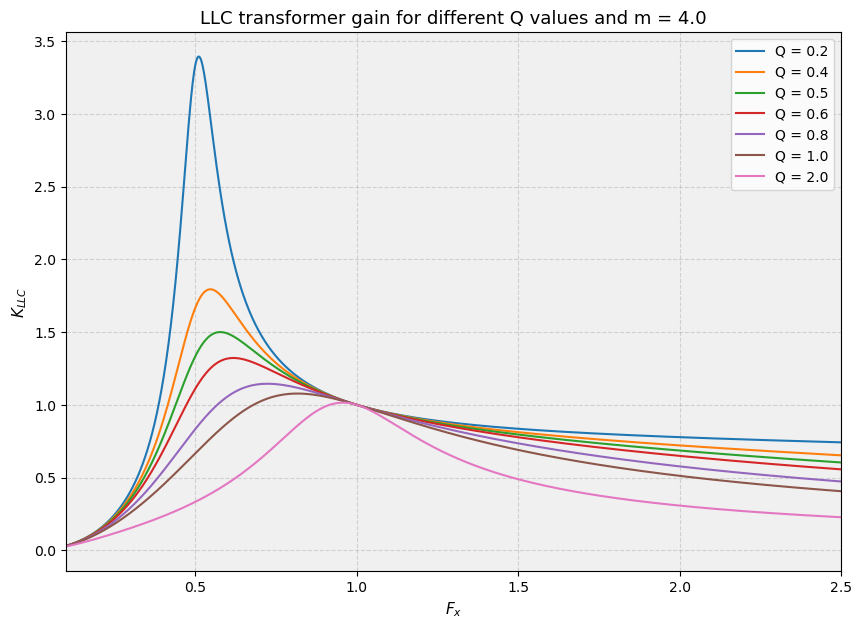

In [3]:
F_x_values = np.linspace(0.1, 2.5, 1000)
Q_values = [0.2, 0.4, 0.5, 0.6, 0.8, 1.0, 2.0]
selected_m_value = 4.0

fig, axis = plt.subplots(figsize=(10, 7))

for Q_value in Q_values:
    gain_values = []
    for F_x_value in F_x_values:
        gain = K_LLC(Q_value, selected_m_value, F_x_value)
        gain_values.append(gain)
    axis.plot(F_x_values, gain_values, label=f'Q = {Q_value}', alpha=1.0)

axis.set_title(f'LLC transformer gain for different Q values and m = {selected_m_value}', fontsize=fontsize_plot_title)
axis.set_xlabel('$F_x$', fontsize=fontsize_xlabel)
axis.set_xlim(F_x_values[0], F_x_values[-1])
axis.set_ylabel('$K_{LLC}$', fontsize=fontsize_ylabel)
axis.legend()
axis.grid(True, linestyle='--', alpha=alpha_plot_grid)
axis.set_facecolor(background_color)

plt.show()

### Step 2: Select the $m$ value

To understand the influence of the $m$ value we need to take a look on the following plots.


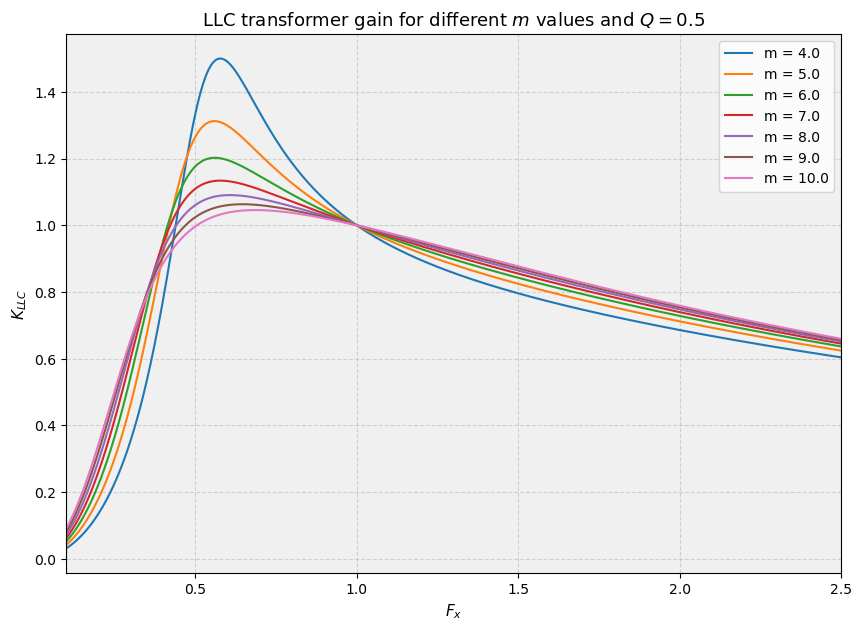

In [4]:
selected_Q_value = 0.5
m_values = [4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

fig, axis = plt.subplots(figsize=(10, 7))

for m_value in m_values:
    gain_values = []
    for F_x_value in F_x_values:
        gain = K_LLC(selected_Q_value, m_value, F_x_value)
        gain_values.append(gain)
    axis.plot(F_x_values, gain_values, label=f'm = {m_value}', alpha=1.0)

axis.set_title(f'LLC transformer gain for different $m$ values and $Q = {selected_Q_value}$', fontsize=fontsize_plot_title)
axis.set_xlabel('$F_x$', fontsize=fontsize_xlabel)
axis.set_xlim(F_x_values[0], F_x_values[-1])
axis.set_ylabel('$K_{LLC}$', fontsize=fontsize_ylabel)
axis.legend()
axis.grid(True, linestyle='--', alpha=alpha_plot_grid)
axis.set_facecolor(background_color)

plt.show()

We can see that for a **low** $m$ value, we have
- a higher boost gain,
- a narrower frequency range,
- a more flexible regulation
  
and for a **high** $m$ value we have
- a higher magnetizing inductance,
- a lower magnetizing circulating current (so less conduction losses),
- and finally a **higher efficiency**

Therefore our goal is to find the maximum possible $m$ value, that still archieves the gain requirements for all load conditions.

There exist different recommendations about how to choose the $m$ value. [AND90061/D](https://www.onsemi.com/pub/collateral/and90061-d.pdf) reports that it is typical to set $m$ between 3 and 7. [Application Note AN 2012-09](https://www.infineon.com/dgdl/Application_Note_Resonant+LLC+Converter+Operation+and+Design_Infineon.pdf?fileId=db3a30433a047ba0013a4a60e3be64a1) recommends a $m$ value between 6 and 10.

### Step 3: Finding the minimum normalized switching frequency

In [5]:
markdown = r"""
As the next step we need to find the minimum normalized switching frequency for maximum load conditions ($Q_{max}$) and the chosen $m$ value, that is still in the inductive region. This point can either be seen visually in the plot at the maximum of the gain curve or be found by solving the following equation:
\begin{equation}
\frac{d}{dF_x} K_{LLC}(Q, m, F_{x,~min}) \biggr| _{Q_{max}=%.1f,~m=%d}  = 0.
\tag{9}
\end{equation}
""" % (selected_Q_value, selected_m_value)
display(Markdown(markdown))



As the next step we need to find the minimum normalized switching frequency for maximum load conditions ($Q_{max}$) and the chosen $m$ value, that is still in the inductive region. This point can either be seen visually in the plot at the maximum of the gain curve or be found by solving the following equation:
\begin{equation}
\frac{d}{dF_x} K_{LLC}(Q, m, F_{x,~min}) \biggr| _{Q_{max}=0.5,~m=4}  = 0.
\tag{9}
\end{equation}


### Step 4: Voltage gain verification

This step is to verify that the voltage gain is reached during maximum load conditions. This can be done by solving
\begin{equation}
K_{LLC,~max} = K_{LLC}(Q_{max}, m, F_{x,~min}).
\tag{10}
\end{equation}

Now the gain $K_{LLC,~max}$ can be compared with the required gain.

If $K_{LLC,~max} > M_{max}$, then reduce the $m$ value to increase efficiency

If $K_{LLC,~max} < M_{max}$, then increase the $m$ value to increase the boost gain.

This way we can iteratively find the optimal $m$ value by repeating steps 3 and 4 until $K_{LLC,~max}$ is equal or slightly bigger than $M_{max}$

### Step 5: Calculating resonant components values

Once the optimal $m$ value is found, we can calculate the resonant component values. We can do this by using the equations (3) - (7).

## Designing Our Resonant LLC Transformer

This section provides the design process of finding the proper values for our resonant LLC transformer.


### Requirements

In [6]:
# For our converter we assume 
U_in_min = 34  # V
U_in_nom = 38  # V
U_in_max = 48  # V
U_bus_min = 400  # V
U_bus_nom = 425  # V
U_bus_max = 450  # V

P_out_max = 400  # W

# Add a safety margin
safety_margin = 0.05
U_in_min_safe = U_in_min * (1 - safety_margin)
U_in_max_safe = U_in_max * (1 + safety_margin)

# Set M_min for f_max < 1.5 Fx
M_min_target = 0.9

# Transformer turn ratio
a = round(U_bus_min / (U_in_max_safe * M_min_target))

# LLC resonant tank gain calculations
M_max = round(U_bus_max / (U_in_min_safe * a), 4)
M_min = round(U_bus_min / (U_in_max_safe * a), 4)

In [7]:
# Putting the calculations into some markdown
markdown_assumptions = r"""
For our converter we assume 

- $U_{in,~min} = %d$,
- $U_{in,~nom} = %d$,
- $U_{in,~max} = %d$,
- $U_{bus,~min} = %d$,
- $U_{bus,~nom} = %d$,
- $U_{bus,~max} = %d$,
""" % (U_in_min, U_in_nom, U_in_max, U_bus_min, U_bus_nom, U_bus_max)

markdown_safety_margin = r"""
and add a little safety margin of %d %% so that

- $U_{in,~min,~safe} = %.1f$,
- $U_{in,~max,~safe} = %.1f$.

""" % (safety_margin*100, U_in_min_safe, U_in_max_safe)

markdown_M_min_target = r"""
Furthermore we define a target minimum LLC resonant tank gain
- $M_{min,~target} = %.1f$

to limit the maximum frequency the converter operates at.
""" % (M_min_target)

markdown_transformer_turn_ratio = r"""
This results in a required transformer turn ratio of
\begin{equation}
a = \frac{N_s}{N_p} = \frac{U_{bus,~min}}{U_{in,~max,~safe} \cdot M_{min,~target}} = \frac{%d}{%.1f \cdot %.1f} ≈ %d
\tag{11}
\end{equation}
""" % (U_bus_min, U_in_max_safe, M_min_target, a)

markdown_M_max = r"""
and a required LLC resonant tank gain of
\begin{equation}
M_{max} = \frac{U_{bus,~max}}{U_{in,~min,~safe} \cdot a} = \frac{%d}{%.1f \cdot %d} = %.4f
\tag{12}
\end{equation}
""" % (U_bus_max, U_in_min_safe, a, M_max)

markdown_M_min = r"""
and 
\begin{equation}
M_{min} = \frac{U_{bus,~min}}{U_{in,~max,~safe} \cdot a} = \frac{%d}{%.1f \cdot %d} = %.4f.
\tag{13}
\end{equation}

""" % (U_bus_min, U_in_max_safe, a, M_min)

display(Markdown(markdown_assumptions))
display(Markdown(markdown_safety_margin))
display(Markdown(markdown_M_min_target))
display(Markdown(markdown_transformer_turn_ratio))
display(Markdown(markdown_M_max))
display(Markdown(markdown_M_min))


For our converter we assume 

- $U_{in,~min} = 34$,
- $U_{in,~nom} = 38$,
- $U_{in,~max} = 48$,
- $U_{bus,~min} = 400$,
- $U_{bus,~nom} = 425$,
- $U_{bus,~max} = 450$,



and add a little safety margin of 5 % so that

- $U_{in,~min,~safe} = 32.3$,
- $U_{in,~max,~safe} = 50.4$.




Furthermore we define a target minimum LLC resonant tank gain
- $M_{min,~target} = 0.9$

to limit the maximum frequency the converter operates at.



This results in a required transformer turn ratio of
\begin{equation}
a = \frac{N_s}{N_p} = \frac{U_{bus,~min}}{U_{in,~max,~safe} \cdot M_{min,~target}} = \frac{400}{50.4 \cdot 0.9} ≈ 9
\tag{11}
\end{equation}



and a required LLC resonant tank gain of
\begin{equation}
M_{max} = \frac{U_{bus,~max}}{U_{in,~min,~safe} \cdot a} = \frac{450}{32.3 \cdot 9} = 1.5480
\tag{12}
\end{equation}



and 
\begin{equation}
M_{min} = \frac{U_{bus,~min}}{U_{in,~max,~safe} \cdot a} = \frac{400}{50.4 \cdot 9} = 0.8818.
\tag{13}
\end{equation}



### Step 1: Selecting $Q_{max}$ value

In [8]:
markdown_Q_max = r"""
We choose $Q_{\max}$ = %.1f.
""" % (selected_Q_value)

display(Markdown(markdown_Q_max))


We choose $Q_{\max}$ = 0.5.


### Step 2: Selecting $m$ value

In [9]:
markdown_m = r"""
We choose $m$ = %.1f as start value.
""" % (selected_m_value)

display(Markdown(markdown_m))


We choose $m$ = 4.0 as start value.


### Step 3: Finding the minimum normalized switching frequency

In [10]:
markdown_m = r"""
Now we can solve the equation (9) and find the minimum normalized switching frequency for $Q_{max} = %.1f$ and $m = %.1f$.

We can go further and already plot the $F_{x,~min}$ for different $Q_{max}$ and $m$ values.
""" % (selected_Q_value, selected_m_value)

display(Markdown(markdown_m))


Now we can solve the equation (9) and find the minimum normalized switching frequency for $Q_{max} = 0.5$ and $m = 4.0$.

We can go further and already plot the $F_{x,~min}$ for different $Q_{max}$ and $m$ values.


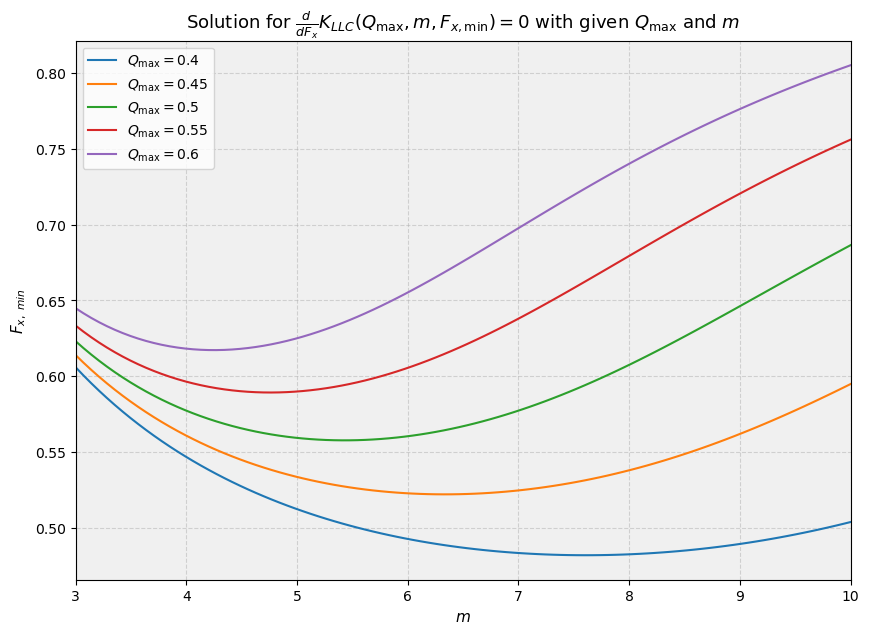

In [11]:
# Define values of interest
Q_max_values = [0.4, 0.45, 0.5, 0.55, 0.6]
m_values = np.linspace(start=3, stop=10, num=100)  # Specify start and stop values

# Create a single plot for F_x
fig, axis1 = plt.subplots(figsize=(10, 7))

for Q_value in Q_max_values:
    min_F_x_values = []
    
    for m_value in m_values:
        # Lambdify the derivative for numerical evaluation
        derivative_func = sym.lambdify(F_x, derivative_K_LLC_F_x.subs({Q: Q_value, m: m_value}), 'numpy')

        # Use NumPy's root_scalar for root finding
        result = root_scalar(derivative_func, bracket=[0.1, 2.0], method='brentq')
        min_F_x = result.root
        
        min_F_x_values.append(min_F_x)

    # Plotting for each Q_max
    axis1.plot(m_values, min_F_x_values, label=r'$Q_{\max} =$' + str(Q_value))

# Set plot properties
axis1.set_title(r'Solution for $\frac{d}{dF_x} K_{LLC}(Q_{\max}, m, F_{x, \min}) = 0$ with given $Q_{\max}$ and $m$', fontsize=fontsize_plot_title)
axis1.set_xlabel('$m$', fontsize=fontsize_xlabel)
axis1.set_xlim([min(m_values), max(m_values)])
axis1.set_ylabel('$F_{x,~min}$', fontsize=fontsize_ylabel)
axis1.grid(True, linestyle='--', alpha=alpha_plot_grid)
axis1.set_facecolor(background_color)
axis1.legend()

plt.show()


### Step 4: Voltage gain verification

We can now plot the $K_{LLC,~max}$ for different $Q_{max}$ and $m$ values and the $F_{x,~min}$ values we obtained in the previous step.

We can use the results in this plot to compare them with the gain requirement $M_{max}$ we defined at the beginning.

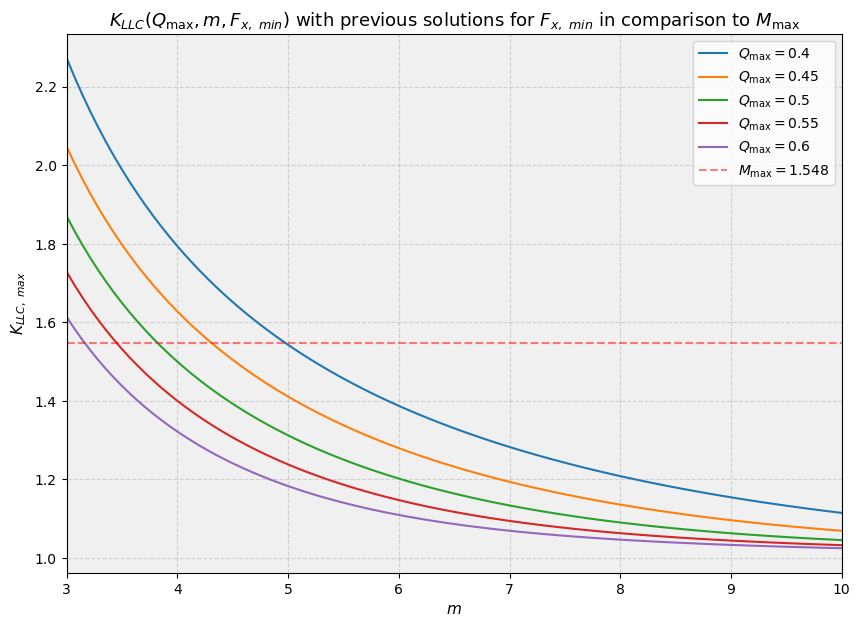

In [12]:
fig, axis2 = plt.subplots(figsize=(10, 7))

for Q_value in Q_max_values:
    K_LLC_max_values = []
    
    for m_value in m_values:
        # Lambdify the derivative for numerical evaluation
        derivative_func = sym.lambdify(F_x, derivative_K_LLC_F_x.subs({Q: Q_value, m: m_value}), 'numpy')

        # Use NumPy's root_scalar for root finding
        result = root_scalar(derivative_func, bracket=[0.1, 2.0], method='brentq')
        min_F_x = result.root

        # Calculate K_LLC_max using the obtained F_x, m, and Q values
        K_LLC_max = K_LLC(Q_value, m_value, min_F_x)
        
        K_LLC_max_values.append(K_LLC_max)

    # Plotting for each Q_max
    axis2.plot(m_values, K_LLC_max_values, label=r'$Q_{\max} =$' + str(Q_value))

# Add a horizontal line for M_max
axis2.axhline(y=M_max, color='r', linestyle='--', label=f'$M_{{\max}} = {M_max}$', alpha=0.5)

# Set plot properties
axis2.set_title(r'$K_{LLC}(Q_{\max}, m, F_{x,~min})$ with previous solutions for $F_{x,~min}$ in comparison to $M_{\max}$', fontsize=fontsize_plot_title)
axis2.set_xlabel('$m$', fontsize=fontsize_xlabel)
axis2.set_xlim([min(m_values), max(m_values)])
axis2.set_ylabel('$K_{LLC,~max}$', fontsize=fontsize_ylabel)
axis2.grid(True, linestyle='--', alpha=alpha_plot_grid)
axis2.set_facecolor(background_color)
axis2.legend()

# Show the plot
plt.show()


Due to the characteristic of solar modules that a decreasing output voltage is accompanied by a decreasing output power we can pick $K_{LLC,~max}$ equal to the $M_{\max}$ requirement and don't need to involve some safty margin. Mind that decreasing power output goes along with decreased Q value and therefore an increased gain capability.

Therefore we are looking for the Q value and m value for which $K_{LLC,~max}$ = $M_{\max}$.

In [13]:
# Lists to store solutions
m_value_solutions = []
K_LLC_max_values_solution = []
diff_K_LLC_max_M_max_solution = []
F_x_min_solutions = []

for Q_value in Q_max_values:
    K_LLC_max_values = []
    F_x_min_results = []
    
    for m_value in m_values:
        # Lambdify the derivative for numerical evaluation
        derivative_func = sym.lambdify(F_x, derivative_K_LLC_F_x.subs({Q: Q_value, m: m_value}), 'numpy')

        # Use NumPy's root_scalar for root finding
        result = root_scalar(derivative_func, bracket=[0.1, 2.0], method='brentq')
        F_x_min = result.root

        # Calculate K_LLC_max using the obtained F_x, m, and Q values
        K_LLC_max = K_LLC(Q_value, m_value, F_x_min)
        
        K_LLC_max_values.append(K_LLC_max)
        F_x_min_results.append(F_x_min)

    # Find the index of the closest K_LLC_max value to M_max
    closest_index = np.argmin(np.abs(np.array(K_LLC_max_values) - M_max))

    # Get the corresponding m value and K_LLC_max value
    closest_m_value = m_values[closest_index]
    closest_K_LLC_max = K_LLC_max_values[closest_index]

    # Calculate the difference between K_LLC_max and M_max
    diff_K_LLC_max_M_max = closest_K_LLC_max - M_max

    # Append the solution to the respective lists
    m_value_solutions.append(round(closest_m_value, 4))
    K_LLC_max_values_solution.append(round(closest_K_LLC_max, 4))
    diff_K_LLC_max_M_max_solution.append(round(diff_K_LLC_max_M_max, 4))
    F_x_min_solutions.append(round(F_x_min_results[closest_index], 4))

# Display the results in a Markdown table
table_markdown = """
For the different combinations of $Q$ and $m$, we found the following solutions:

| $Q$   | $m$        | $K_{LLC_,~max}$| $M_{max}$    | $F_{x,~min}$ |
|-------|------------|----------------|--------------|--------------|
"""

for i in range(len(Q_max_values)):
    table_markdown += "| {:<5} | {:<10} | {:<13} | {:<12} | <b>{:<13.4f}</b> |\n".format(
        Q_max_values[i], m_value_solutions[i], K_LLC_max_values_solution[i], M_max, F_x_min_solutions[i]
    )

display(Markdown(table_markdown))


For the different combinations of $Q$ and $m$, we found the following solutions:

| $Q$   | $m$        | $K_{LLC_,~max}$| $M_{max}$    | $F_{x,~min}$ |
|-------|------------|----------------|--------------|--------------|
| 0.4   | 4.9798     | 1.5467        | 1.548        | <b>0.5130       </b> |
| 0.45  | 4.2727     | 1.5562        | 1.548        | <b>0.5514       </b> |
| 0.5   | 3.8485     | 1.5398        | 1.548        | <b>0.5821       </b> |
| 0.55  | 3.4242     | 1.5565        | 1.548        | <b>0.6130       </b> |
| 0.6   | 3.1414     | 1.5557        | 1.548        | <b>0.6385       </b> |


The possible solutions that fit the given $M_{max}$ requirement can now be used to check what maximum frequency $F_{x,~max}$ would be required to archieve the desired $M_{min}$ requirement.

In [14]:
F_x_max_solutions = []
K_LLC_min_values_solution = []

for i in range(len(Q_max_values)):
    for F_x_value in F_x_values:
        # Calculate K_LLC using the obtained F_x, m, and Q values
        K_LLC_value = K_LLC(Q_max_values[i], m_value_solutions[i], F_x_value)

        # Check if K_LLC is less than M_min
        if float(K_LLC_value) < M_min and F_x_value > 1.0:
            F_x_max_solutions.append(round(F_x_value, 4))
            K_LLC_min_values_solution.append(round(K_LLC_value, 4))
            # Break the inner loop once a solution is found for the current (m, Q) pair
            break

# Display the results in a Markdown table
table_markdown = """
For the different combinations of $Q$ and $m$, we found the following solutions:

| $Q$   | $m$        | $K_{LLC,~min}$| $M_{min}$    |$F_{x, ~max}$|
|-------|------------|---------------|--------------|-------------|
"""

for i in range(len(Q_max_values)):
    table_markdown += "| {:<5} | {:<10} | {:<13} | {:<12} | <b>{:<13}</b> |\n".format(
        Q_max_values[i], m_value_solutions[i], K_LLC_min_values_solution[i], M_min, F_x_max_solutions[i]
    )

display(Markdown(table_markdown))



For the different combinations of $Q$ and $m$, we found the following solutions:

| $Q$   | $m$        | $K_{LLC,~min}$| $M_{min}$    |$F_{x, ~max}$|
|-------|------------|---------------|--------------|-------------|
| 0.4   | 4.9798     | 0.8813        | 0.8818       | <b>1.3348       </b> |
| 0.45  | 4.2727     | 0.8811        | 0.8818       | <b>1.2652       </b> |
| 0.5   | 3.8485     | 0.8808        | 0.8818       | <b>1.2243       </b> |
| 0.55  | 3.4242     | 0.8811        | 0.8818       | <b>1.1859       </b> |
| 0.6   | 3.1414     | 0.8807        | 0.8818       | <b>1.1619       </b> |


Now we can inspect the results visually in the plots of the different $K_{LLC}$ curves.

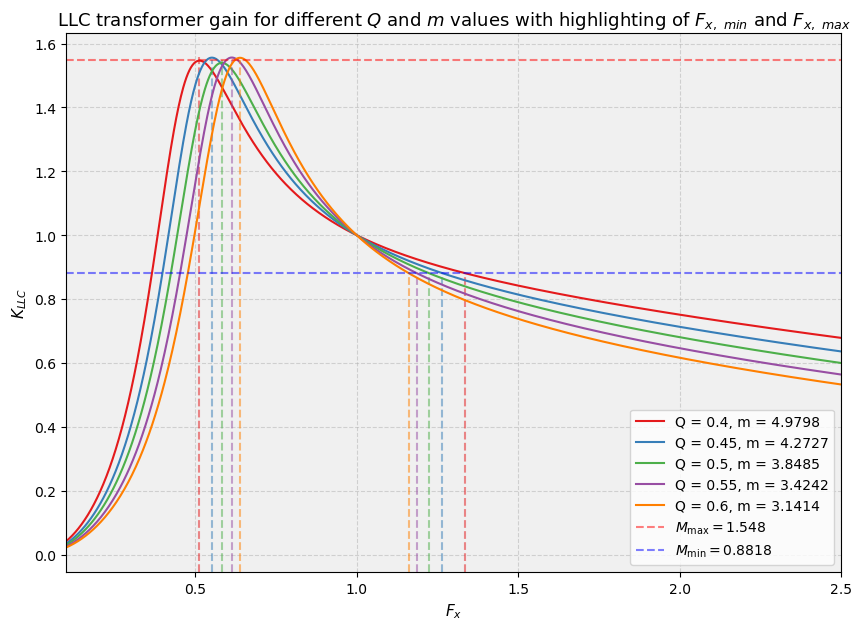

In [15]:
# Set up the plot
fig, axis = plt.subplots(figsize=(10, 7))

# Plot K_LLC values for different m_value_solutions and Q_max_values
for i in range(len(Q_max_values)):
    gain_values = []
    color = plt.cm.Set1(i)

    for F_x_value in F_x_values:
        gain = K_LLC(Q_max_values[i], m_value_solutions[i], F_x_value)
        gain_values.append(gain)
    axis.plot(F_x_values, gain_values, label=f'Q = {Q_max_values[i]}, m = {m_value_solutions[i]}', color=color, alpha=1.0)

    axis.axvline(x=F_x_min_solutions[i], ymin=0, ymax=(M_max - axis.get_ylim()[0]) / (axis.get_ylim()[1] - axis.get_ylim()[0]), linestyle='--', color=color, alpha=0.5)

    axis.axvline(x=F_x_max_solutions[i], ymin=0, ymax=(M_min - axis.get_ylim()[0]) / (axis.get_ylim()[1] - axis.get_ylim()[0]), linestyle='--', color=color, alpha=0.5)

# Add a horizontal line for M_max and M_min
axis.axhline(y=M_max, color='r', linestyle='--', label=f'$M_{{\max}} = {M_max}$', alpha=0.5)
axis.axhline(y=M_min, color='b', linestyle='--', label=f'$M_{{\min}} = {M_min}$', alpha=0.5)

axis.set_title(r'LLC transformer gain for different $Q$ and $m$ values with highlighting of $F_{x,~min}$ and $F_{x,~max}$', fontsize=fontsize_plot_title)
axis.set_xlabel('$F_x$', fontsize=fontsize_xlabel)
axis.set_xlim(F_x_values[0], F_x_values[-1])
axis.set_ylabel('$K_{LLC}$', fontsize=fontsize_ylabel)
axis.legend()
axis.grid(True, linestyle='--', alpha=alpha_plot_grid)
axis.set_facecolor(background_color)

plt.show()


### Step 5: Calculating resonant components values

We can now calculate the resonant components values using the equations (3) - (7).

In [16]:
R_ac_min = (8 / math.pi**2) * (1/a)**2 * (U_bus_nom**2 / P_out_max)

# Resonant frequency
f_r = 100 * 10**3  # converting kHz to Hz

results = []

for i in range(len(Q_max_values)):
    Q_max = Q_max_values[i]
    m = m_value_solutions[i]

    # Calculating Lr/Cr from Q_max equation
    Lr_over_Cr = (Q_max * R_ac_min)**2

    # Calculating Lr*Cr from fr equation
    Lr_times_Cr = 1 / ((2 * math.pi * f_r)**2)

    # Solving for Lr and Cr individually
    Lr = math.sqrt(Lr_over_Cr * Lr_times_Cr)
    Cr = Lr_times_Cr / Lr

    # Calculating Lm from m equation
    Lm = m*Lr - Lr

    results.append((Q_max, m, round(Lr, 10), round(Lm, 10), round(Cr, 10)))

markdown_R_ac_min = r"""
This results in

$R_{ac,~min} = %f Ω$

and for the different combinations of $Q$ and $m$:
""" % (round(R_ac_min, 4))

# Display the results in a Markdown table
table_markdown = """
| $Q$   | $m$    | $L_r$           | $L_m$           | $C_r$          |
|-------|--------|-----------------|-----------------|----------------|
"""

for result in results:
    table_markdown += "| {:<5} | {:<6} | {:<15} | {:<15} | {:<15} |\n".format(*result)

display(Markdown(markdown_R_ac_min))
display(Markdown(table_markdown))


This results in

$R_{ac,~min} = 4.518800 Ω$

and for the different combinations of $Q$ and $m$:



| $Q$   | $m$    | $L_r$           | $L_m$           | $C_r$          |
|-------|--------|-----------------|-----------------|----------------|
| 0.4   | 4.9798 | 2.8768e-06      | 1.14489e-05     | 8.805e-07       |
| 0.45  | 4.2727 | 3.2364e-06      | 1.05916e-05     | 7.827e-07       |
| 0.5   | 3.8485 | 3.5959e-06      | 1.02431e-05     | 7.044e-07       |
| 0.55  | 3.4242 | 3.9555e-06      | 9.589e-06       | 6.404e-07       |
| 0.6   | 3.1414 | 4.3151e-06      | 9.2404e-06      | 5.87e-07        |


# Calculating LLC Transformer Gain For Given Transformer

In the previous section we described how to find the optimal values for the required LLC transformer. These values can then be used to contact a manufacturer to build a transformer with the requested values.

For the first prototype it can be useful to just use a prebuild transformer.
Therefore this section can be used to put in the component values of a given
LLC transformer and see the resulting gain curves for it.



## LLC resonant component values

In the following script it is possible to add the $L_m$, $L_r$, $N_s$ and $N_p$ of some given transformers and compare the resulting gain curves.

In [17]:
# Transformer parameters
# The first values are for the WE-LLCR Resonant Converter 760895631: https://www.we-online.com/components/products/datasheet/760895631.pdf
# The second values are for the WE-LLCR Resonant Converter 760895641: https://www.we-online.com/components/products/datasheet/760895641.pdf
L_m_values = [0.6612 * 10 ** (-6), 2.6448 * 10 ** (-6)]
L_r_values = [0.1551 * 10 ** (-6), 0.6204 * 10 ** (-6)]
N_p_values = [2, 4]
N_s_values = [35, 35]

# Resonant frequency
f_r = 225 * 10**3

# Nominal bus voltage
U_bus_nom = 425

# Maximum output power
P_out_max = 400

F_x_values = np.linspace(0.1, 2.5, 1000)

R_ac_results = []
C_r_results = []
Q_results = []
m_results = []

F_x_min_solutions = []
K_LLC_max_values_solutions = []

F_x_max_solutions = []
K_LLC_min_values_solutions = []

for L_m, L_r, N_p, N_s in zip(L_m_values, L_r_values, N_p_values, N_s_values):
    # Calculating R_ac
    R_ac = (8 / math.pi**2) * (N_p**2 / N_s**2) * (U_bus_nom**2 / P_out_max)

    # Solving for C_r
    Lr_times_Cr = 1 / ((2 * math.pi * f_r) ** 2)
    C_r = Lr_times_Cr / L_r

    # Calculating LLC resonant tank gain
    Q_result = math.sqrt(L_r / C_r) / R_ac
    m_result = (L_r + L_m) / L_r

    R_ac_results.append(R_ac)
    C_r_results.append(C_r)
    Q_results.append(Q_result)
    m_results.append(m_result)

    # Finding the F_x_max and K_LLC_min solution
    (F_x_max, KLLC_min) = next(
        (fx, gain)
        for fx in F_x_values
        if fx > 1.0 and (gain := K_LLC(Q_result, m_result, fx)) < M_min
    )

    F_x_max_solutions.append(round(F_x_max, 4))
    K_LLC_min_values_solutions.append(round(KLLC_min, 4))

    # Finding the F_x_min and K_LLC_max solution
    (F_x_min, K_LLC_max) = next(
        (fx, gain)
        for fx in reversed(F_x_values)
        if (gain := K_LLC(Q_result, m_result, fx)) > M_max
    )
    K_LLC_max_values_solutions.append(round(K_LLC_max, 4))
    F_x_min_solutions.append(round(F_x_min, 4))

# Display the results in a Markdown table
table_markdown = """
| $L_m$ | $L_r$ | $N_p$ | $N_s$ |$R_{ac}$| $Q$ | $m$ | $C_r$ |$F_{x,~min}$|$K_{LLC,~max}$|$F_{x,~max}$|$K_{LLC,~min}$|
|-------|-------|-------|-------|--------|-----|-----|-------|------------|--------------|------------|--------------|
"""

results = zip(
    L_m_values,
    L_r_values,
    N_p_values,
    N_s_values,
    R_ac_results,
    Q_results,
    m_results,
    C_r_results,
    F_x_min_solutions,
    K_LLC_max_values_solutions,
    F_x_max_solutions,
    K_LLC_min_values_solutions,
)

for result in results:
    table_markdown += "| {:<15} | {:<15} | {:<5} | {:<5}  | {:<5.4f} | {:<5.4f} | {:<6.4f} | {:<15} | {:<15} | {:<15} | {:<15} | {:<15} | \n".format(
        *result
    )

display(Markdown(table_markdown))


| $L_m$ | $L_r$ | $N_p$ | $N_s$ |$R_{ac}$| $Q$ | $m$ | $C_r$ |$F_{x,~min}$|$K_{LLC,~max}$|$F_{x,~max}$|$K_{LLC,~min}$|
|-------|-------|-------|-------|--------|-----|-----|-------|------------|--------------|------------|--------------|
| 6.612e-07       | 1.5509999999999998e-07 | 2     | 35     | 1.1952 | 0.1835 | 5.2631 | 3.225993063569909e-06 | 0.6165          | 1.5518          | 1.4646          | 0.8816          | 
| 2.6448e-06      | 6.203999999999999e-07 | 4     | 35     | 4.7807 | 0.1835 | 5.2631 | 8.064982658924772e-07 | 0.6165          | 1.5518          | 1.4646          | 0.8816          | 


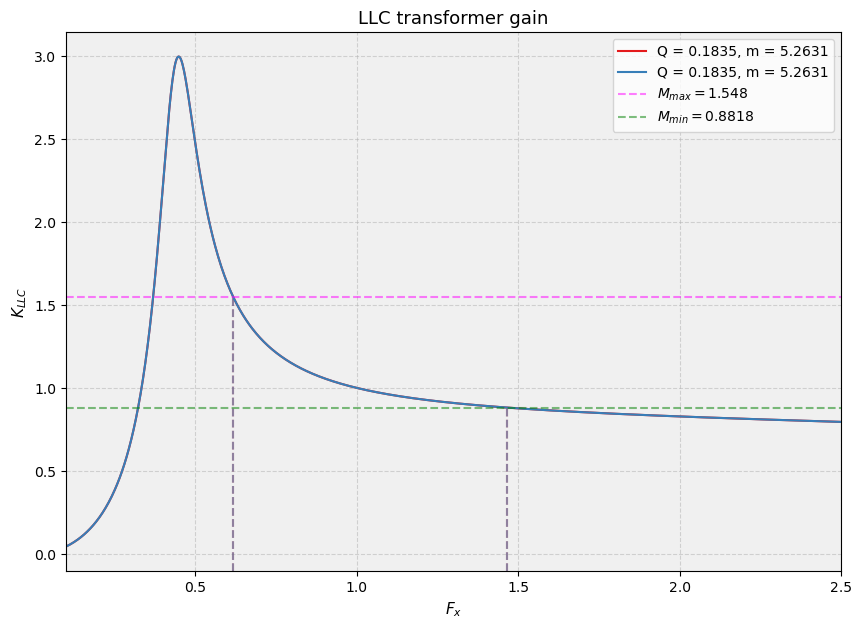

In [18]:
# Create the plot for the resonant tank gain
fig, axis = plt.subplots(figsize=(10, 7))

gain_values = []

for i in range(len(m_results)):
    gain_values = []
    color = plt.cm.Set1(i)

    for F_x_value in F_x_values:
        gain = K_LLC(Q_results[i], m_results[i], F_x_value)
        gain_values.append(gain)

    axis.plot(F_x_values, gain_values, label=f'Q = {round(Q_results[i], 4)}, m = {round(m_results[i], 4)}', color=color, alpha=1.0)

    axis.axvline(x=F_x_min_solutions[i], ymin=0, ymax=(K_LLC_max_values_solutions[i] - axis.get_ylim()[0]) / (axis.get_ylim()[1] - axis.get_ylim()[0]), linestyle='--', color=color, alpha=0.5)
    axis.axvline(x=F_x_max_solutions[i], ymin=0, ymax=(M_min - axis.get_ylim()[0]) / (axis.get_ylim()[1] - axis.get_ylim()[0]), linestyle='--', color=color, alpha=0.5)

# Add a horizontal line for M_max and M_min
axis.axhline(y=M_max, color='magenta', linestyle='--', label=f'$M_{{max}} = {M_max}$', alpha=0.5)
axis.axhline(y=M_min, color='green', linestyle='--', label=f'$M_{{min}} = {M_min}$', alpha=0.5)

axis.set_title(f'LLC transformer gain', fontsize=fontsize_plot_title)
axis.set_xlabel('$F_x$', fontsize=fontsize_xlabel)
axis.set_xlim(F_x_values[0], F_x_values[-1])
axis.set_ylabel('$K_{LLC}$', fontsize=fontsize_ylabel)
axis.legend()
axis.grid(True, linestyle='--', alpha=alpha_plot_grid)
axis.set_facecolor(background_color)

plt.show()

# Phase-Shift Modulation for LLC Resonant Converter

So far the resonant converter gain $K_{LLC}$ was only controlled by traditional pulse-frequency modulation (**PFM**). Another method to control the gain is the so called phase-shift pulse-width modulation (**PS-PWM**), which is described for example in [(Xingkui et al., 2016)](https://www.researchgate.net/publication/309733350_Grid-connected_Photovoltaic_Micro-inverter_with_New_Hybrid_Control_LLC_Resonant_Converter), [(Alamir et al., 2018)](https://www.researchgate.net/publication/329390128_Fixed_Frequency_Predictive_MPPT_for_Phase-shift_Modulated_LLC_resonant_Micro-inverter) or [(Guo et al., 2018)](http://koreascience.or.kr/article/JAKO201815565838021.page).

Therefore we introduce the phase-shift duty cycle $D$. Considering relatively small $D$ and $D' = 1 - D$, the converter voltage gain equation extends to

\begin{equation}
K_{LLC} (f_s, D, k, Q) = \frac{\sin\left(\frac{D' \pi}{2}\right)}{\sqrt{\left( \bigl( 1 - \frac{1}{f_s^2} \bigr) \cdot \frac{1}{k} + 1\right)^2 + \left( \bigl( f_s - \frac{1}{f_s} \bigr) \cdot \frac{2 \cdot Q}{1 - \cos(D' \pi)}\right)^2 }},
\tag{13}
\end{equation}

where $k = \frac{L_m}{L_r}$. The parameter $k$ and $Q$ are defined by the parameters of the resonant tank, so $f_s$ and $D$ are the control parameters. Note that for $D = 0$ the equation $K_{LLC} (f_s, D, k, Q)$ becomes the traditional equation stated in (2).

In [19]:
# Define symbols
F_x, D, k, Q = sym.symbols('F_x D k Q')

# Define the function K_LLC
def K_LLC(F_x, D, k, Q):
    numerator = sym.sin((1 - D) * sym.pi / 2)
    denominator = sym.sqrt(((1 - 1/F_x**2) * (1/k) + 1)**2 + ((F_x - 1/F_x) * (2 * Q) / (1 - sym.cos((1 - D) * sym.pi)))**2)
    return numerator / denominator

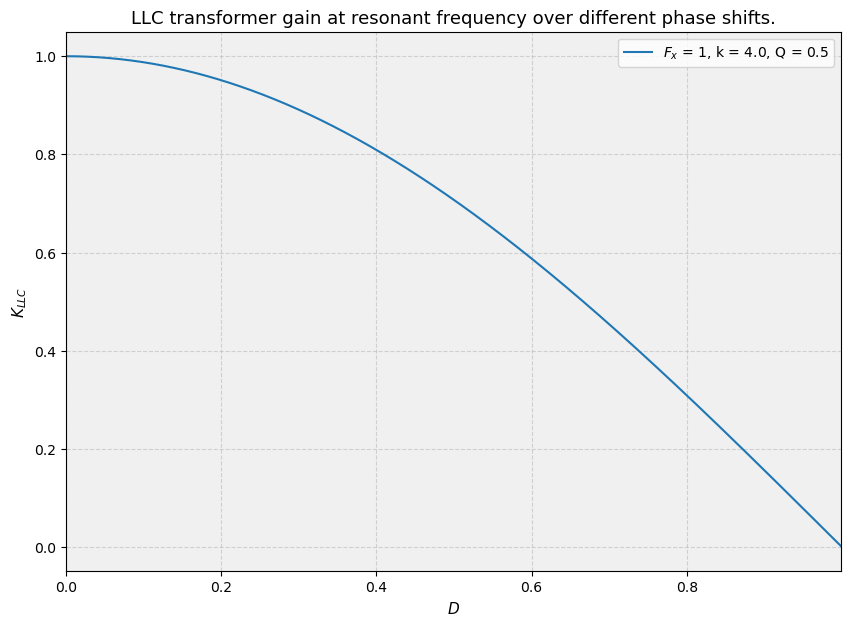

In [23]:
selected_F_x = 1
selected_k_value = 4.0
selected_Q_value = 0.5
D_values = np.linspace(0.0, 0.999, 1000)

fig, axis = plt.subplots(figsize=(10, 7))

selected_Q_value, selected_m_value

gain_values = []
for D_value in D_values:
    gain = K_LLC(selected_F_x, D_value, selected_k_value, selected_Q_value)
    gain_values.append(gain)

axis.plot(D_values, gain_values, label=f'$F_x$ = {selected_F_x}, k = {selected_k_value}, Q = {selected_Q_value}', alpha=1.0)

axis.set_title(f'LLC transformer gain at resonant frequency over different phase shifts.', fontsize=fontsize_plot_title)
axis.set_xlabel('$D$', fontsize=fontsize_xlabel)
axis.set_xlim(D_values[0], D_values[-1])
axis.set_ylabel('$K_{LLC}$', fontsize=fontsize_ylabel)
axis.legend()
axis.grid(True, linestyle='--', alpha=alpha_plot_grid)
axis.set_facecolor(background_color)

plt.show()